<a href="https://colab.research.google.com/github/AsraniSanjana/All_Codes/blob/main/All_Semester_Codes/ML_sem7/models/ML08_D17B1_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SANJANA ASRANI

D17B, ROLL NO. 01

ML LAB 08 : PERFORM LDA

DOP: 25/09/23

Dataset Link: https://www.kaggle.com/datasets/arshid/iris-flower-dataset

Features:

sepal_length, sepal_width, petal_length, petal_width, species

Perform LDA as  a classifier and dimension reduction technique using the following steps
1. Importing Libraries
2. Importing the Dataset
3. Data Preprocessing
4. Feature Scaling
5. Performing LDA
6. Training and Making Predictions
7. Evaluating the Performance


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
#load iris dataset
iris = datasets.load_iris()

#convert dataset to pandas DataFrame
df = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                 columns = iris['feature_names'] + ['target'])
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.columns = ['s_length', 's_width', 'p_length', 'p_width', 'target', 'species']

#view first six rows of DataFrame
df.head()

,s_length,s_width,p_length,p_width,target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [ ]:
#find how many total observations are in dataset
len(df.index)

150

In [ ]:
#define predictor and response variables
X = df[['s_length', 's_width', 'p_length', 'p_width']]
y = df['species']

#Fit the LDA model
model = LinearDiscriminantAnalysis()
model.fit(X, y)

LinearDiscriminantAnalysis()

In [ ]:
#Define method to evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))

0.9800000000000001


In [ ]:
# Define new observation
new = [5, 3, 1, 0.4]
predicted_class = model.predict([new])

# Create a DataFrame to display the predicted class
predicted_df = pd.DataFrame({'Predicted Species': predicted_class})

# Map the predicted class index to the actual species name
predicted_df['Predicted Species'] = predicted_df['Predicted Species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print(predicted_df)


  Predicted Species
0               NaN


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


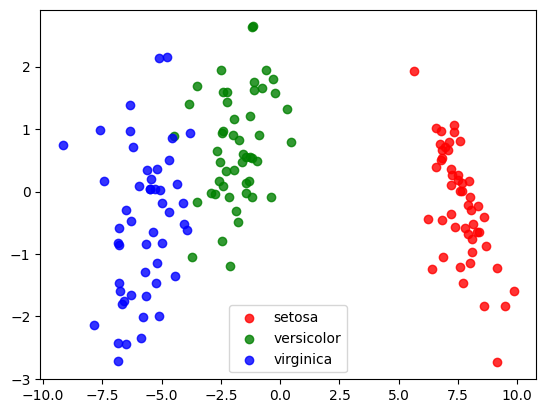

In [ ]:
#define data to plot
X = iris.data
y = iris.target
model = LinearDiscriminantAnalysis()
data_plot = model.fit(X, y).transform(X)
target_names = iris.target_names

#create LDA plot
plt.figure()
colors = ['red', 'green', 'blue']
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(data_plot[y == i, 0], data_plot[y == i, 1], alpha=.8, color=color,
                label=target_name)

#add legend to plot
plt.legend(loc='best', shadow=False, scatterpoints=1)

#display LDA plot
plt.show()




.

                                  
                                                                        
                                                                  .


# **Dimensionality Reduction**

In [ ]:



from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_components = 1  # Number of components to retain
lda = LinearDiscriminantAnalysis(n_components=n_components)
X_lda = lda.fit_transform(X_scaled, y)

df_lda = pd.DataFrame(data=X_lda, columns=[f'LD{i+1}' for i in range(n_components)])

df_lda.head()

,LD1
0,8.061800
1,7.128688
2,7.489828
3,6.813201
4,8.132309


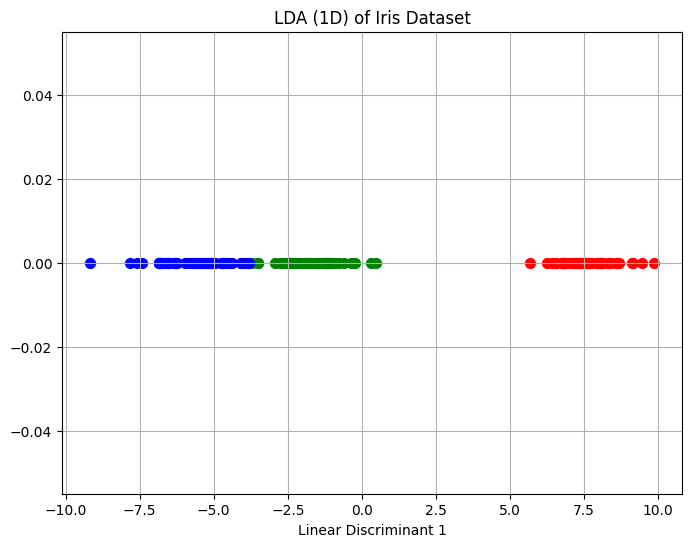

In [ ]:
plt.figure(figsize=(8, 6))
targets = np.unique(y)
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indices = y == target
    plt.scatter(df_lda.loc[indices, 'LD1'], np.zeros_like(df_lda.loc[indices, 'LD1']), c=color, s=50)

plt.xlabel('Linear Discriminant 1')
plt.title('LDA (1D) of Iris Dataset')
plt.grid()
plt.show()